<a href="https://colab.research.google.com/github/GabrielPGu/Quimica/blob/main/Cin%C3%A9tica_Molecular.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$$\Large \textit{UNMSM | Química}$$
$$\large \textbf{Cinética Química}$$

_Profesor: Jesus Alvarado Huayhuaz_
_Alumno: Gabriel Poma Gutierrez_



Determinar la energía de activación para la reacción de isomerización (estudio cinético) e indicar si la reacción es endotérmica o exotérmica (estudio termodinámico):

## **Cis_buteno:**

In [ ]:
! pip install rdkit
! pip install pyscf

In [4]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.drawOptions.addAtomIndices = True

In [5]:
from pyscf import gto, scf

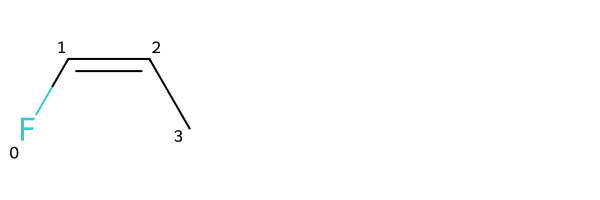

In [6]:
smiles = "F\C=C/C"

mol = Chem.MolFromSmiles(smiles)

Draw.MolsToGridImage([mol])

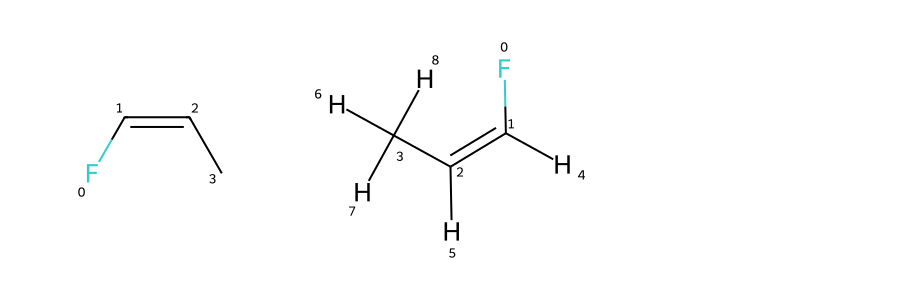

In [7]:
mol_h = Chem.AddHs(mol)

Draw.MolsToGridImage([mol, mol_h], subImgSize=(300,300))

In [8]:
Chem.AllChem.EmbedMolecule(mol_h)
print(Chem.MolToMolBlock(mol_h))


     RDKit          3D

  9  8  0  0  0  0  0  0  0  0999 V2000
    1.1808    1.5005    0.5321 F   0  0  0  0  0  0  0  0  0  0  0  0
    1.2955    0.2366    0.0442 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.2498   -0.5351   -0.2253 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.1141    0.0312    0.0267 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.2866   -0.2066   -0.1511 H   0  0  0  0  0  0  0  0  0  0  0  0
    0.3984   -1.5377   -0.6138 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.8891   -0.4676   -0.6070 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.3164   -0.1516    1.1146 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.0915    1.1301   -0.1204 H   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  2  0
  3  4  1  0
  2  5  1  0
  3  6  1  0
  4  7  1  0
  4  8  1  0
  4  9  1  0
M  END



In [9]:
Chem.MolToXYZFile(mol_h,"cis_buteno.xyz")

In [10]:
mol = gto.M(atom="cis_buteno.xyz")

In [ ]:
mol.basis = "3-21G"

mf = mol.KS()
mf.xc = 'b3lyp'

In [12]:
cis = mf.kernel()

converged SCF energy = -214.251651928337


## **Trans_buteno:**

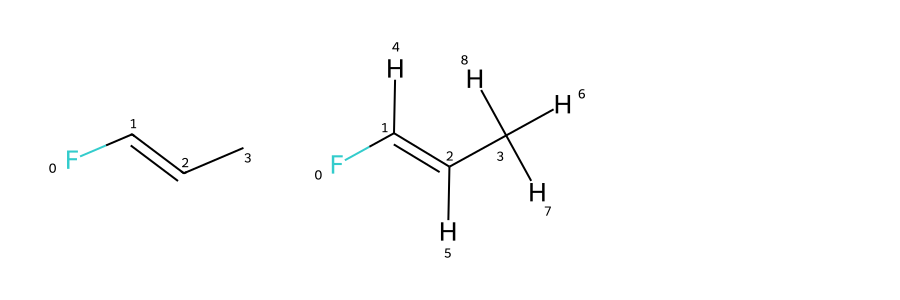

In [13]:
smiles = "F/C=C/C"

mol = Chem.MolFromSmiles(smiles)
mol_h = Chem.AddHs(mol)

Draw.MolsToGridImage([mol, mol_h], subImgSize=(300,300))

In [14]:
Chem.AllChem.EmbedMolecule(mol_h)
print(Chem.MolToMolBlock(mol_h))


     RDKit          3D

  9  8  0  0  0  0  0  0  0  0999 V2000
    2.5486   -0.1067    0.1969 F   0  0  0  0  0  0  0  0  0  0  0  0
    1.3076    0.2723   -0.1597 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.2585   -0.3783    0.3001 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.1415    0.0188   -0.0784 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.1461    1.1036   -0.8191 H   0  0  0  0  0  0  0  0  0  0  0  0
    0.3292   -1.2429    0.9812 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5522    0.5938    0.7853 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.7179   -0.9188   -0.2477 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.1783    0.6583   -0.9587 H   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  2  0
  3  4  1  0
  2  5  1  0
  3  6  1  0
  4  7  1  0
  4  8  1  0
  4  9  1  0
M  END



In [15]:
Chem.MolToXYZFile(mol_h,"trans_buteno.xyz")

In [16]:
mol2 = gto.M(atom="trans_buteno.xyz")


In [17]:
mol2.basis = "3-21G"

mf2 = mol2.KS()
mf2.xc = 'b3lyp'

In [18]:
trans = mf2.kernel()

converged SCF energy = -214.251852671682


## **Estado de Transicion:**

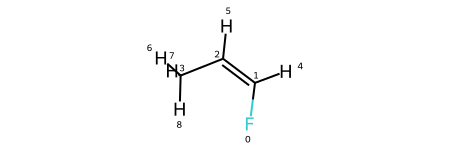

In [19]:
smiles = "F\C=C/C"
mol = Chem.MolFromSmiles(smiles)
mol = Chem.AddHs(mol)
Chem.AllChem.EmbedMolecule(mol)
Chem.MolToXYZFile(mol, "initial.xyz")
mol

In [20]:
diedros = [0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330]
mol_lista = []
for i in diedros:
  Chem.AllChem.SetDihedralDeg(mol.GetConformer(0),3,2,1,0,i)

  Chem.MolToXYZFile(mol, f"{i}.xyz")

In [21]:
moleculas_diedros = ["0.xyz", "30.xyz", "60.xyz", "90.xyz", "120.xyz",
                    "150.xyz", "180.xyz", "240.xyz", "300.xyz", "330.xyz"]
diedros_lista = []
for i in moleculas_diedros:
  mol = gto.M(atom=i)
  mol.basis = "3-21G"
  mf = mol.KS()
  mf.xc = 'b3lyp'
  #mf.kernel()
  diedros_lista.append(mf.kernel())

converged SCF energy = -214.250904816753
converged SCF energy = -214.231242967854
converged SCF energy = -214.173117408624
converged SCF energy = -214.081805983256
converged SCF energy = -214.169021685517
converged SCF energy = -214.228967782882
converged SCF energy = -214.250412225158
converged SCF energy = -214.174065244877
converged SCF energy = -214.168869200468
converged SCF energy = -214.229559383867


### **Grafica:**

In [ ]:
pip install git+https://github.com/giacomomarchioro/PyEnergyDiagrams

In [23]:
import matplotlib.pyplot as plt
from energydiagram import ED

In [24]:
diedros_lista


[-214.25090481675315,
 -214.23124296785363,
 -214.17311740862374,
 -214.0818059832564,
 -214.16902168551692,
 -214.22896778288208,
 -214.25041222515773,
 -214.17406524487723,
 -214.16886920046807,
 -214.2295593838669]

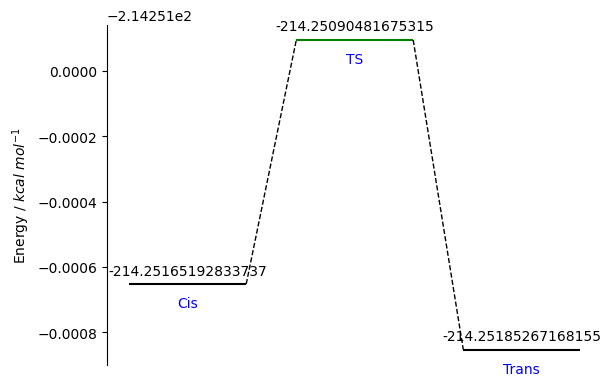

<Figure size 10000x5000 with 0 Axes>

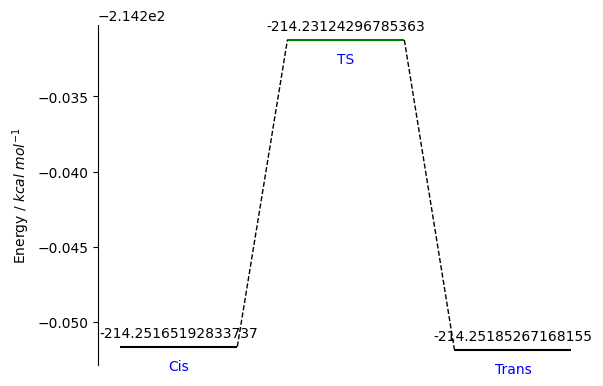

<Figure size 10000x5000 with 0 Axes>

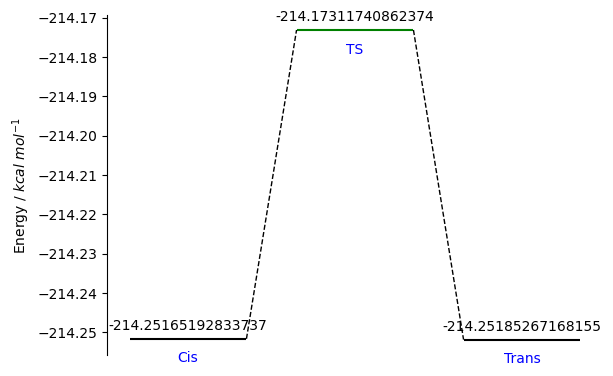

<Figure size 10000x5000 with 0 Axes>

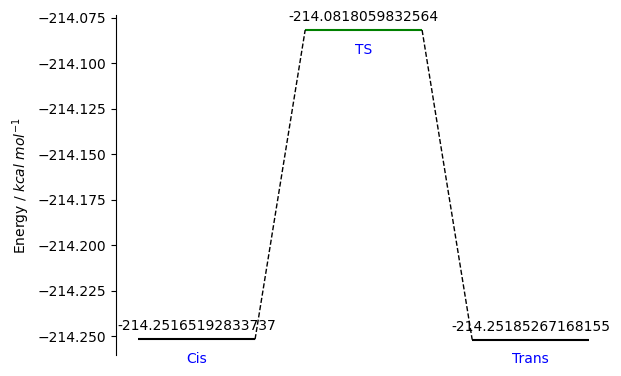

<Figure size 10000x5000 with 0 Axes>

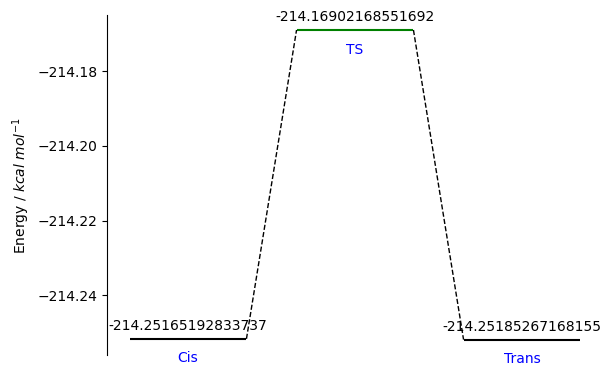

<Figure size 10000x5000 with 0 Axes>

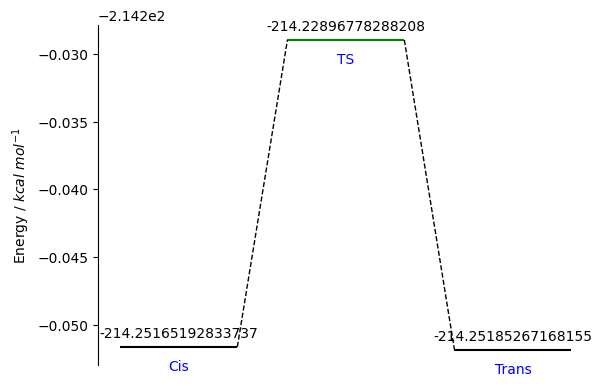

<Figure size 10000x5000 with 0 Axes>

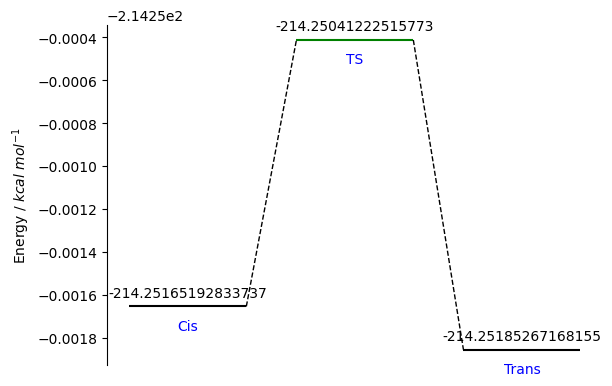

<Figure size 10000x5000 with 0 Axes>

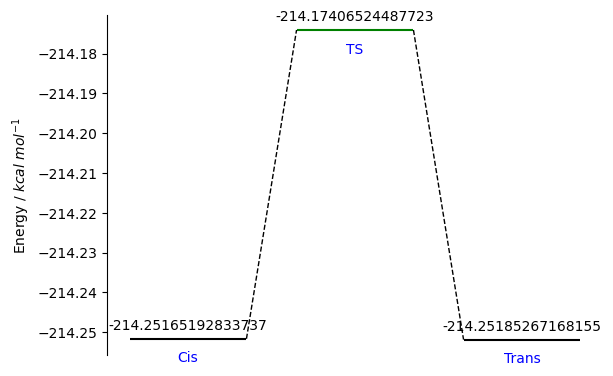

<Figure size 10000x5000 with 0 Axes>

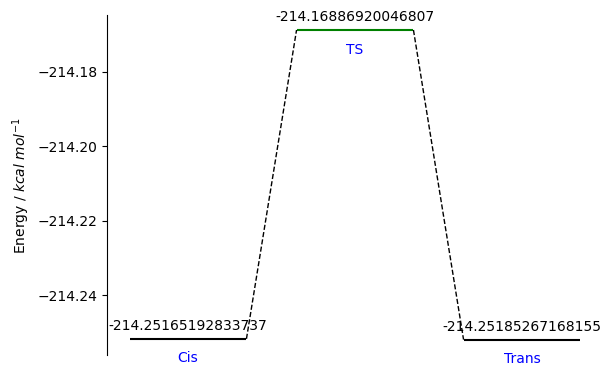

<Figure size 10000x5000 with 0 Axes>

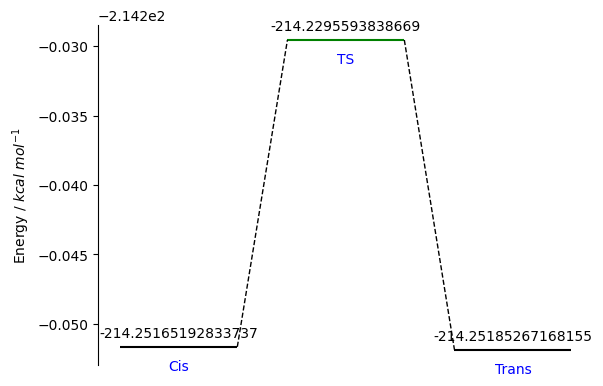

<Figure size 10000x5000 with 0 Axes>

In [31]:
for i in diedros_lista:
  diagram = ED()
  diagram.add_level(cis,'Cis')
  diagram.add_level(i,'TS',color='g')
  diagram.add_level(trans,'Trans')

  diagram.add_link(0,1)
  diagram.add_link(1,2)
  diagram.plot(ylabel="Energy / $kcal$ $mol^{-1}$")
  plt.figure(figsize=(100, 50))


### **Para calcular variaciones y activacion de energia**

In [38]:

def calcular_variaciones(cis, trans):
  x = trans - (cis)
  return x

print("La variacion de energia es:", calcular_variaciones(cis,trans))
print("Las energias de activacion para cada grado de 0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, y 300 respectivamente son:")

for i in diedros_lista:
  def calcular_energia_activacion(cis, i):
    y = i -(cis)
    return y

  print(calcular_energia_activacion(cis,i))


La variacion de energia es: -0.00020074334418040962
Las energias de activacion para cada grado de 0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, y 300 respectivamente son:
0.0007471115842179188
0.020408960483734973
0.07853451971362801
0.16984594508096507
0.08263024282044285
0.022684145455286853
0.0012397031796353986
0.0775866834601402
0.08278272786930074
0.0220925444704676


In [ ]:
min_y = min(diedros_lista)
max_y = max(diedros_lista)
diedros_lista_norm = [(valor - min_y) / (max_y - min_y) for valor in diedros_lista]

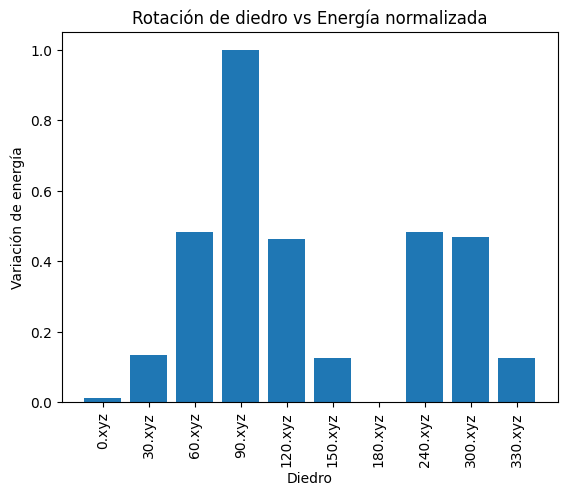

In [ ]:
import matplotlib.pyplot as plt

plt.bar(moleculas_diedros,diedros_lista_norm)
plt.xlabel('Diedro')
plt.ylabel('Variación de energía')
plt.xticks(rotation=90)
plt.title('Rotación de diedro vs Energía normalizada')
plt.show()